In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [2]:
flight=pd.read_excel("E:/imarticus/excels/flight.xlsx")
flight.head(5)

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
0,Kevin,Som,29.0,20.0,A,U,8,On,L,5
1,Kevin,kevin,23.0,16.0,B,U,8,On,L,5
2,Kevin,RR,NaN,18.0,A,L,10,On,R,6
3,Priya,Nithya,27.0,20.0,A,U,10,On,R,4
4,Priya,Priya,29.5,17.5,B,U,5,Off,R,8


<h3> DATA CLEANING AND DATA VISUALISATION</h3>

In [3]:
flight.shape

(88, 10)

In [4]:
flight.isnull().sum()

Person              0
Item_Identifier     0
Length             17
Breadth             0
PaperQuality        8
Angle               4
Foldings            0
Windspeed           0
Dominanthand        0
Distance            0
dtype: int64

<h2>LENGTH</h2>

In [5]:
flight.Length.describe()

count    71.000000
mean     26.708451
std      11.920268
min       0.000000
25%      22.500000
50%      28.500000
75%      29.500000
max      98.000000
Name: Length, dtype: float64

In [6]:
flight.Length.fillna(flight.Length.mean(),inplace=True)

In [7]:
Q1=flight.Length.quantile(0.25)
Q3=flight.Length.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
print(Q1,Q3,IQR,UE,LE)

24.5 29.5 5.0 37.0 17.0


In [8]:
flight.Length[flight.Length>UE]=UE
flight.Length[flight.Length<LE]=LE

C:\Users\Jothy Natarajan\AppData\Local\Temp/ipykernel_4724/3988765081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight.Length[flight.Length>UE]=UE
C:\Users\Jothy Natarajan\AppData\Local\Temp/ipykernel_4724/3988765081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight.Length[flight.Length<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x145e8beb8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x145e8bebf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x145e8beb460>],
 'medians': [<matplotlib.lines.Line2D at 0x145e8bfe670>],
 'fliers': [<matplotlib.lines.Line2D at 0x145e8bfea00>],
 'means': []}

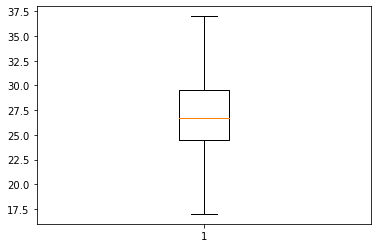

In [9]:
plt.boxplot(flight.Length)

<AxesSubplot:>

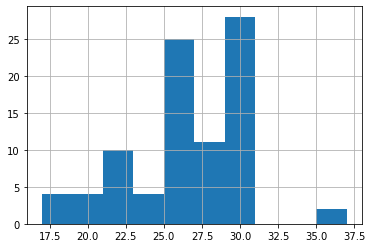

In [10]:
flight.Length.hist()

<h3>BREADTH</h3>

In [11]:
flight.Breadth.describe()

count    88.000000
mean     18.500000
std       1.339068
min      16.000000
25%      17.500000
50%      18.500000
75%      20.000000
max      20.500000
Name: Breadth, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x145e8d96fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x145e8da6700>,
 'boxes': [<matplotlib.lines.Line2D at 0x145e8d96c70>],
 'medians': [<matplotlib.lines.Line2D at 0x145e8da6e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x145e8db11f0>],
 'means': []}

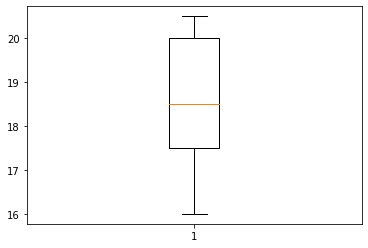

In [12]:
plt.boxplot(flight.Breadth)

<AxesSubplot:>

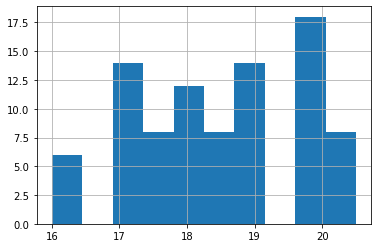

In [13]:
flight.Breadth.hist()

<h2>PAPER QUALITY</h2>

In [14]:
flight.PaperQuality.describe()

count     80
unique     2
top        B
freq      47
Name: PaperQuality, dtype: object

In [15]:
flight.PaperQuality.value_counts()

B    47
A    33
Name: PaperQuality, dtype: int64

In [16]:
flight.PaperQuality.fillna("A",inplace=True)

<AxesSubplot:xlabel='PaperQuality', ylabel='count'>

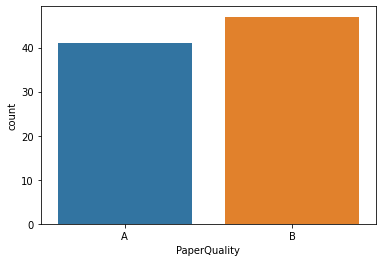

In [17]:
sns.countplot(x="PaperQuality",data=flight)

<h2>ANGLE</h2>

In [18]:
flight.Angle.describe()

count     84
unique     2
top        U
freq      62
Name: Angle, dtype: object

In [19]:
flight.Angle.value_counts()

U    62
L    22
Name: Angle, dtype: int64

In [20]:
flight.Angle.fillna("U",inplace=True)

<AxesSubplot:xlabel='Angle', ylabel='count'>

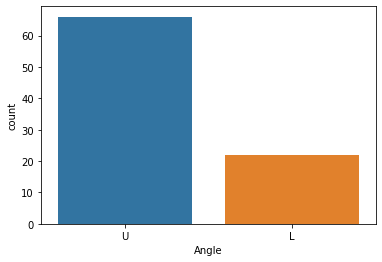

In [21]:
sns.countplot(x="Angle",data=flight)

<h2>WINDSPEED</h2>

In [22]:
flight.Windspeed.describe()

count     88
unique     2
top       On
freq      44
Name: Windspeed, dtype: object

In [23]:
flight.Windspeed.value_counts()

On     44
Off    44
Name: Windspeed, dtype: int64

<AxesSubplot:xlabel='Windspeed', ylabel='count'>

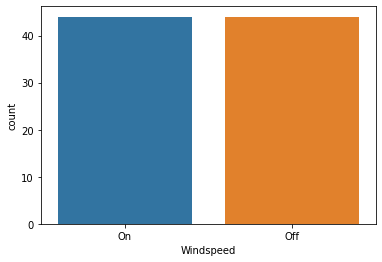

In [24]:
sns.countplot(x="Windspeed",data=flight)

<h2>FOLDINGS</h2>

In [25]:
flight.Foldings.describe()

count    88.000000
mean      8.136364
std       1.736570
min       5.000000
25%       8.000000
50%       8.000000
75%      10.000000
max      10.000000
Name: Foldings, dtype: float64

In [26]:
flight.Foldings.value_counts()

8     42
10    30
5     16
Name: Foldings, dtype: int64

<AxesSubplot:xlabel='Foldings', ylabel='count'>

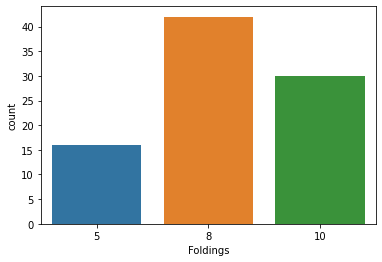

In [27]:
sns.countplot(x="Foldings",data=flight)

<h2>HYPOTHESIS TESTING</h2>

In [28]:
flight.Foldings=flight.Foldings.replace(5,"five")
flight.Foldings=flight.Foldings.replace(8,"eight")
flight.Foldings=flight.Foldings.replace(10,"ten")

In [29]:
f5=flight.Distance[flight.Foldings=='five']
f8=flight.Distance[flight.Foldings=='eight']
f10=flight.Distance[flight.Foldings=='ten']

In [30]:
stats.f_oneway(f5,f8,f10)

F_onewayResult(statistic=2.1214130696889306, pvalue=0.12616487246048383)

<h2>DOMINANT HAND</h2>

In [31]:
flight.Dominanthand.describe()

count     88
unique     2
top        R
freq      70
Name: Dominanthand, dtype: object

In [32]:
flight.Dominanthand.value_counts()

R    70
L    18
Name: Dominanthand, dtype: int64

<AxesSubplot:xlabel='Dominanthand', ylabel='count'>

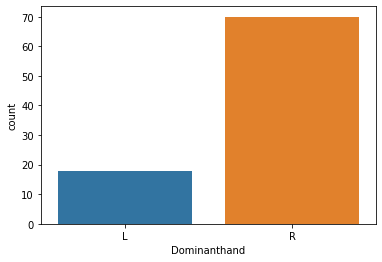

In [33]:
sns.countplot(x="Dominanthand",data=flight)

In [34]:
flight.drop('Item_Identifier',axis=1,inplace=True)

<h2>CREATING DUMMY VALUES</h2>

In [35]:
dummy=pd.get_dummies(flight[["PaperQuality",'Angle',"Windspeed","Foldings","Dominanthand"]])
dummy= pd.concat([flight.Distance,flight.Length,flight.Breadth,dummy], axis=1)
dummy.head(5)

,Distance,Length,Breadth,PaperQuality_A,PaperQuality_B,Angle_L,Angle_U,Windspeed_Off,Windspeed_On,Foldings_eight,Foldings_five,Foldings_ten,Dominanthand_L,Dominanthand_R
0,5,29.000000,20.0,1,0,0,1,0,1,1,0,0,1,0
1,5,23.000000,16.0,0,1,0,1,0,1,1,0,0,1,0
2,6,26.708451,18.0,1,0,1,0,0,1,0,0,1,0,1
3,4,27.000000,20.0,1,0,0,1,0,1,0,0,1,0,1
4,8,29.500000,17.5,0,1,0,1,1,0,0,1,0,0,1


In [36]:
dummy.shape

(88, 14)

<h2>SCALING</h2>

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(dummy)
scaled_data=scaler.transform(dummy)
rocket= pd.DataFrame(scaled_data)

In [38]:
rocket.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.4,0.600000,0.888889,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.4,0.300000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.5,0.485423,0.444444,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.3,0.500000,0.888889,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.7,0.625000,0.333333,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [39]:
rocket.columns=[["Distance","Length","Breadth","PaperQuality_A","PaperQuality_B","Angle_L","Angle_U","Windspeed_Off","Windspeed_On","Foldings_eight","Foldings_five","Foldings_ten","Dominanthand_L","Dominanthand_R"]]

In [40]:
y=rocket.Distance
x=rocket.drop("Distance",axis=1)

C:\Users\Jothy Natarajan\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [41]:
y.shape

(88, 1)

In [42]:
x.shape

(88, 13)

<h2> PERFORMING REGRESSION </h2>

In [43]:
def func(x,y):
    x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =50)
    rmse=[]
    #Linear regression
    model=LinearRegression().fit(x_train,y_train)
    y_predicted=model.predict(x_test)
    rmse.append(mean_squared_error(y_test,y_predicted,squared=False))
    #DecisionTreeRegresso
    model1=DecisionTreeRegressor().fit(x_train,y_train)
    y_predicted=model1.predict(x_test)
    rmse.append(mean_squared_error(y_test,y_predicted,squared=False))
    #RandomForestRegressor
    model2=RandomForestRegressor(n_estimators=100,max_depth=2).fit(x_train,y_train)
    y_predicted=model2.predict(x_test)
    rmse.append(mean_squared_error(y_test,y_predicted,squared=False))
    #GradientBoostingRegressor
    model3=GradientBoostingRegressor(n_estimators=100,max_depth=2).fit(x_train,y_train)
    y_predicted=model3.predict(x_test)
    rmse.append(mean_squared_error(y_test,y_predicted,squared=False))
    #AdaBoostRegressor
    model4 = AdaBoostRegressor().fit(x_train,y_train)
    y_predicted=model4.predict(x_test)
    rmse.append(mean_squared_error(y_test,y_predicted,squared=False))
    return rmse
result=[]
name=['LINEAR REGRESSION', 'DECISION TREE REGRESSION', 'RANDOM FOREST REGRESSION', 'GRADIENT BOOSTING REGRESSION', 'ADABOOST REGRESSION']
result=func(x,y)
print('\033[1m',name[result.index(min(result))],"is the best fit model with a RMSE of ",min(result),'\033[0m')

C:\Users\Jothy Natarajan\AppData\Local\Temp/ipykernel_4724/2132839413.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2=RandomForestRegressor(n_estimators=100,max_depth=2).fit(x_train,y_train)


 LINEAR REGRESSION is the best fit model with a RMSE of  0.18071228007084295 


C:\Users\Jothy Natarajan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Jothy Natarajan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<h3>Replacing distance as a Discrete data</h3>

In [44]:
Y=flight.Distance
Y=Y.replace([ 1, 3, 4, 5],"<=5")

In [45]:
Y=Y.replace([6,7,8,9,10,11],">5")

In [46]:
Y.value_counts()

>5     55
<=5    33
Name: Distance, dtype: int64

<h2> PERFORMING CLASSIFICATION </h2>

In [47]:
def func1(x,Y):
    x_train,x_test,Y_train,Y_test= train_test_split(x,Y,train_size = 0.8, test_size = 0.2,random_state =42)
    score2=[]
    #LogisticRegression
    model1=LogisticRegression().fit(x_train,Y_train)
    score2.append(model1.score(x_test,Y_test))
    Y_predicted=model1.predict(x_test)
    #DecisionTreeClassifie
    model2=DecisionTreeClassifier().fit(x_train,Y_train)
    score2.append(model2.score(x_test,Y_test))
    Y_predicted=model2.predict(x_test)
    #RandomForestClassifie
    model3=RandomForestClassifier(n_estimators=100,max_depth=2).fit(x_train,Y_train)
    score2.append(model3.score(x_test,Y_test))
    Y_predicted=model3.predict(x_test)
    #GradientBoostingClassifie
    model4=GradientBoostingClassifier(n_estimators=100,max_depth=2).fit(x_train,Y_train)
    score2.append(model4.score(x_test,Y_test))
    Y_predicted=model4.predict(x_test)
    #AdaBoostClassifier
    model5=AdaBoostClassifier().fit(x_train,Y_train)
    score2.append(model5.score(x_test,Y_test))
    Y_predicted=model5.predict(x_test)
    return score2

name1=['LOGISTIC REGRESSION', 'DECISION TREE CLASSIFICATION', 'RANDOM FOREST CLASSIFICATION', 'GRADIENT BOOSTING CLASSIFICATION', 'ADABOOST CLASSIFICATION']
score1=[]
score1=func1(x,Y)
print('\033[1m',name1[score1.index(max(score1))],"is the best fit model with a score of ",max(score1),'\033[0m')

 LOGISTIC REGRESSION is the best fit model with a score of  0.5555555555555556 
